In [1]:
"Optimal emission decomposition for a specific firm, scenario, and sector"

'Optimal emission decomposition for a specific firm, scenario, and sector'

For a given firm, we pick one SSP and one sector.

We want to plot the different emissions $\widehat{\gamma}_{e,t}$ for each energy type $e$.

We consider three different energy types:

- Power/CO2e ratio $\theta_{e} = \frac{1}{3600} \frac{1}{Emission \, factor} \, \rm{kW / kgCO_2e}$


In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from firm import Firm
from utils import SCENARIOS, SECTORS

# Set default matplotlib parameters
plt.rcParams["figure.figsize"] = [9.0, 7.0]
sns.set_style(
    style="ticks",
    rc={
        "axes.grid": True,
        "axes.spines.top": False,
        "axes.spines.right": False,
    },
)
sns.set_context(
    context="poster",
    rc={
        "grid.linewidth": 1.0,
        "legend.fontsize": "x-small",
        "legend.title_fontsize": "xx-small",
    },
)


In [4]:
T_SSP_INITIAL = 2015.0
T_SSP_FINAL = 2100.0
T_FINAL = T_SSP_FINAL - T_SSP_INITIAL

In [ ]:
ENERGY_TYPES = ["Natural gas", "Elec (Nuclear)", "Elec (Coal)"]
THETA_NATURAL_GAS = (1.0 / 0.202) / 3600.0
THETA_ELEC_NUCLEAR = (1.0 / 0.012) / 3600.0
THETA_ELEC_COAL = (1.0 / 0.820) / 3600.0
theta = np.array([THETA_NATURAL_GAS, THETA_ELEC_NUCLEAR, THETA_ELEC_COAL])

# Set parameters
params = {
    "prod_0": 1.0,
    "r": 0.05,
    "sig": 0.1,
    "a": 0.0,
    "b": 0.0,
    "c": 1.0 * np.array([1.0, 1.0, 1.0]),
    "n_units": 1,
    "w_1": 1e-4,
    # "w_2": 0.0,
    "w_2": 1e-4,
    "alpha": np.array([0.05, 0.16, 0.16]),
    "beta": np.array([1.0, 1.0, 1.0]),
    "theta": theta,
    "t_final": T_FINAL,
}

N_POINTS = 200
tab_t = np.linspace(0.0, T_FINAL, N_POINTS)

In [6]:
SCENARIO = SCENARIOS[4]
SECTOR = SECTORS[1]
print(f"Scenario: {SCENARIO}, Sector: {SECTOR}")

Scenario: SSP5-85 (Baseline), Sector: Industrial Sector


In [7]:
firm = Firm(**params, scenario=SCENARIO, sector=SECTOR)
gam_opt = firm.gamma_optimal_energy(tab_t)

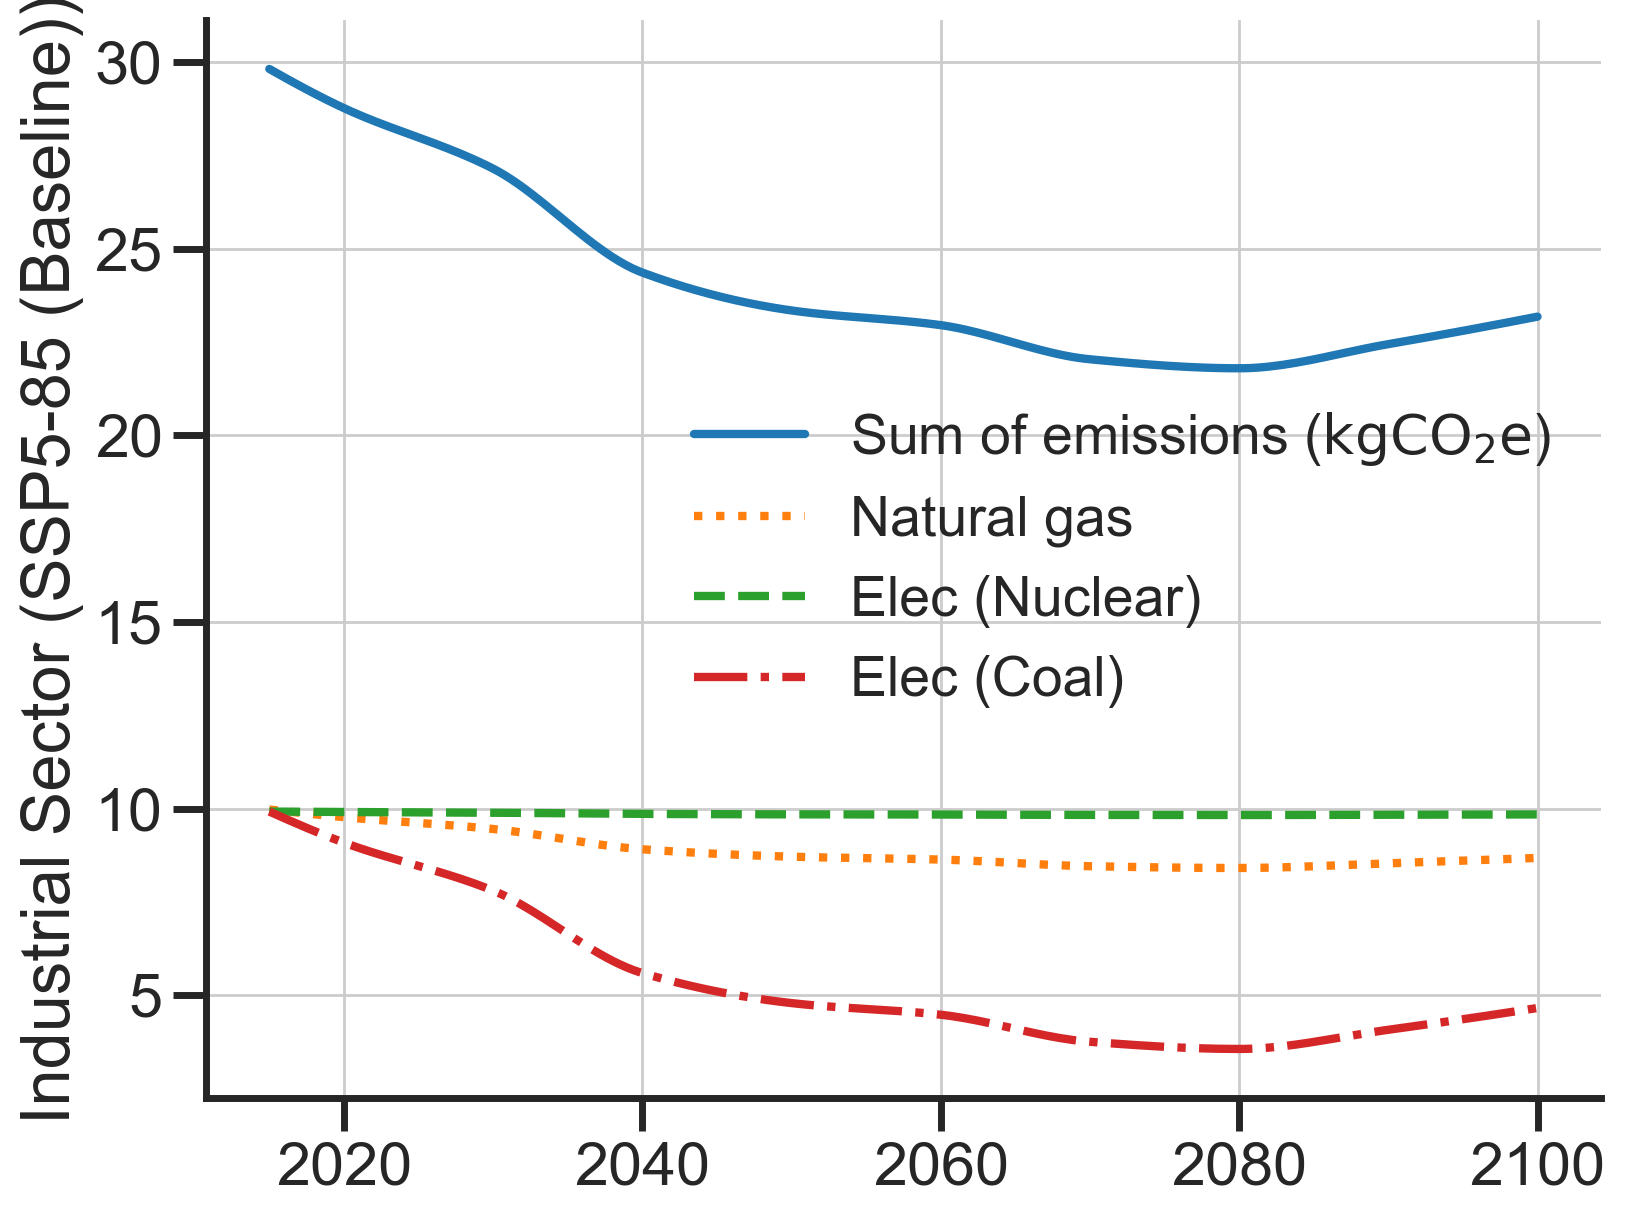

In [8]:
LINESTYLES = ["dotted", "dashed", "dashdot"]

fig, ax = plt.subplots()
ax.plot(
    T_SSP_INITIAL + tab_t,
    gam_opt.sum(axis=0),
    label="Sum of emissions (${\\mathrm{kgCO_2e}}$)",
)
for i in range(gam_opt.shape[0]):
    plt.plot(
        T_SSP_INITIAL + tab_t,
        gam_opt[i, :],
        linestyle=LINESTYLES[i],
        label=ENERGY_TYPES[i],
    )
ax.set_ylabel(f"{SECTOR} ({SCENARIO})")
ax.legend(framealpha=0, fontsize="small", ncol=1)
plt.show()